In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
t, g, m, l, w, a, b = smp.symbols(r't g m l \omega a b')

In [3]:
the1, the2 = smp.symbols(r'\theta_1 \theta_2', cls=smp.Function)
the1 = the1(t)
the2 = the2(t)

In [4]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

In [5]:
x1 = l*smp.sin(the1) + a*smp.sin(w*t)
y1 = -l*smp.cos(the1)
x2 = l*smp.sin(the1) + l*smp.sin(the2) + a*smp.sin(w*t)
y2 = -l*smp.cos(the1) - l*smp.cos(the2)

In [6]:
T = 1/2 * m * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2 + smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
V = m* g * (y1 + y2)
L = T-V

In [8]:
F = 1/2 * b * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2 + smp.diff(x2, t)**2 + smp.diff(y2, t)**2)

In [9]:
LE1 = - smp.diff(L, the1) + smp.diff(smp.diff(L, the1_d), t) + smp.diff(F,the1_d)
LE1 = LE1.simplify()

In [10]:
LE2 = - smp.diff(L, the2) + smp.diff(smp.diff(L, the2_d), t) + + smp.diff(F,the2_d)
LE2 = LE2.simplify()

In [11]:
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd),simplify=False, rational=False)

In [12]:
dz1dt_f = smp.lambdify((t, g, m, l, w, a, b, the1, the2, the1_d, the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t, g, m, l, w, a, b, the1, the2, the1_d, the2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

In [13]:
def dSdt(S, t, g, m, l, w, a, b):
    the1, z1, the2, z2 = S
    return [
        dthe1dt_f(z1),
        dz1dt_f(t, g, m, l, w, a, b, the1, the2, z1, z2),
        dthe2dt_f(z2),
        dz2dt_f(t, g, m, l, w, a, b, the1, the2, z1, z2),
    ]

In [39]:
t = np.linspace(0, 50, 1001)
g = 9.81
m = 1
l = 1
w = 10
a = 0.1
b = 0
ans = odeint(dSdt, y0=[1.14, -2, 1.02, 3.14], t=t, args=(g,m,l,w,a,b))

In [40]:
the1 = ans.T[0]
the1_d = ans.T[1]
the2 = ans.T[2]
the2_d = ans.T[3]

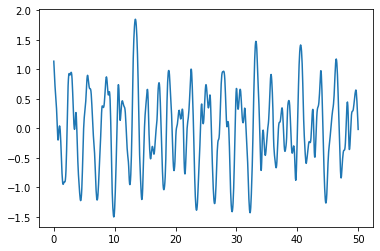

In [41]:
plt.plot(t,the1)

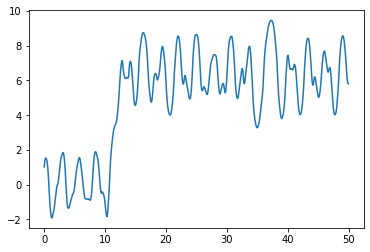

In [42]:
plt.plot(t,the2)

In [43]:
def get_x0y0x1y1x2y2(t, the1, the2, l, a, w):
    return (a*np.sin(w*t),
            0*t,
            a*np.sin(w*t) + l*np.sin(the1),
            -l*np.cos(the1),
            a*np.sin(w*t) + l*np.sin(the1) + l*np.sin(the2),
            -l*np.cos(the1) - l*np.cos(the2),
    )

x0, y0, x1, y1, x2, y2 = get_x0y0x1y1x2y2(t, ans.T[0], ans.T[2], l, a, w)

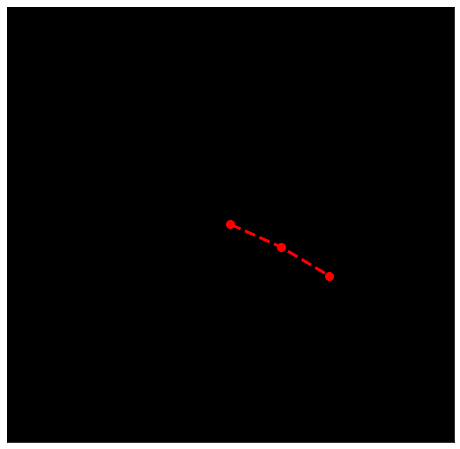

In [45]:
def animate(i):
    ln1.set_data([x0[i], x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('simulation.gif',writer='pillow',fps=25)